<a id='top'></a>

# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**:  

***

This assignment is due on Canvas by **5 PM on Friday February 1**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a/ id='p1'></a>

### (10 pts) Problem 1 
***

![hedgehog](https://www.irishexaminer.com/remote/media.central.ie/media/images/h/hedgehog17_large.jpg?width=648&s=ie-467290)

Hedgehogs are undeniably one of the cutest creatures in all of the land, so the University of Colorado Boulder wants to switch its mascot to the hedgehog. Before making the switch, the CU officials need to know whether they will be able to find new hedgehog mascot handlers, similar to the current Ralphie handlers. You are called upon to perform an experiment to order to determine how fit CU Boulder students are for hedgehog-handling. There are too many students at CU for you to test all of their **Hedgehog-Handling Ability** (HHA), so from a roster of all students and their majors, you will randomly test the HHA of one-tenth of the majors from each department on campus. (Assume nobody is a double major, and assume that everybody has a major.) From this sample, you will estimate the mean HHA of all students on campus, and let the CU officials know whether or not CU students will be able to handle hedgehogs.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

**Solution:**

- the population: All the students at CU Boulder
- the sample frame: the roster of all students and their majors
- the sample: the randomly sampled one-tenth of all students in each major
- the type of sample: stratified
- the quantity of interest: students' (mean) hedgehog-handling ability (HHA)

[Back to top](#top)

<br>

<a/ id='p2'></a>

### (20 pts) Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
y \quad 
5.4 \quad
5.0 \quad
6.5 \quad
7.7 \quad
6.0 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=2$. Compute them both again for $y=8$.

In [1]:
y = 2
x = np.array([y,5.4,5.0,6.5,7.7,6.0,1.9])
print("y={}".format(y))
print("The Mean is {:.3f}".format(x.mean()))
x.sort()
print("The Median is {:.1f}".format(x[3]))

y = 8
x = np.array([y,5.4,5.0,6.5,7.7,6.0,1.9])
print("y={}".format(y))
print("The Mean is {:.3f}".format(x.mean()))
x.sort()
print("The Median is {:.1f}".format(x[3]))

NameError: name 'np' is not defined

**Solution:**

For $y=2$, the mean is 4.929 and the median is 5.4.

For $y=8$, the mean is 5.786 and the median is 6.0.

**Part B**: Is there a value for $y$ that would make the mean of those data equal to $4$? If so, calculate the value of $y$ that makes the mean equal to $4$. If not, clearly explain why not.

Is there a value for $y$ that would make the median of those data equal to $4$? If so, calculate the value of $y$ that makes the median equal to $4$. If not, clearly explain why not.

**Solution:**

The definition of the mean is:
$$\bar{x} = \frac{y + \sum_{k=1}^6 x_k}{7}$$
so solving for $y$ we get
$$y = 7 \bar{x} - \sum_{k=1}^6 x_k$$
Now, we can simply plug in $4$ for $\bar{x}$ and compute what $y$ should be:

In [3]:
x = np.array([5.4,5.0,6.5,7.7,6.0,1.9])
y = 7 * 4 - np.sum(x)
print("For xbar=4, set y={}".format(y))

For xbar=4, set y=-4.5


There **is no value for $y$** such that the median of those data can be equal to $4$. This is because there are 7 data points, including $y$, so the median will be the middle value when they are sorted. This means the median must be one of the data points. Since 4 is not one of the data points, *if* the median was equal to 4, then $y$ must be equal to 4. But if $y=4$ then our sorted data set is:
$$
1.9 \quad
4.0 \quad
5.0 \quad
5.4 \quad
6.0 \quad
6.5 \quad
7.7 \quad
$$
which has a median of 5.4. Thus, it is impossible to have a median of 4.

**Part C**: Compute the sample median for the following cases: 
- $y=5$ 
- $y=50$ 
- $y=5.39$ 
- $y=5.41$
- $y \to \infty$ 
- $y \to -\infty$ 

In [4]:
# SOLUTION:

yvals = [5,50,5.39,5.41,np.Infinity,-np.Infinity]
for y in yvals:
    x = np.array([y,5.4,5.0,6.5,7.7,6.0,1.9])
    print("When y is {}, the median is {}".format(y,np.median(x)))

When y is 5, the median is 5.4
When y is 50, the median is 6.0
When y is 5.39, the median is 5.4
When y is 5.41, the median is 5.41
When y is inf, the median is 6.0
When y is -inf, the median is 5.4


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

**Solution:**

We can push the sample mean around a lot, since we have an equation above that tells us what to set $y$ to for any $\bar{x}$. So $\bar{x}$ can be anything. In math, we could write this as $(-\infty,\infty)$.

The median is different. When $y\geq 6.0$, the median will be $6.0$.  Similarly, whenever $y \leq 5.4$, the median will be $5.4$. If $5.4 < y < 6.0$, then the median will be whatever we choose $y$ to be. Therefore, the median can be only in the closed interval $[5.4,6.0]$.

[Back to top](#top)

<br>

<a/ id='p3'></a>

### (20 pts) Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

**Solution**: 

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}


**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may **not** use any built-in sample mean or variance functions.

In [5]:
# SOLUTION:

def my_sample_mean(xx):
    n = len(xx)
    total = np.sum(xx)
    return total/n

def my_sample_var(xx):
    mean = my_sample_mean(xx)
    centered = xx - mean
    squared = centered**2
    return np.sum(squared)/(len(xx)-1)

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the hedgehog-handling abilities (HHA) of a sample of 12 CU Boulder hedgehog handlers.

`hha = [98, 26, 83, 56, 60, 39, 81, 19, 72, 78, 94, 42]`

In [6]:
# SOLUTION:

hha = [98, 26, 83, 56, 60, 39, 81, 19, 72, 78, 94, 42]
print(my_sample_mean(hha),my_sample_var(hha))

62.333333333333336 690.0606060606061


- `hha` mean: 62.33. 
- `hha` variance: 690.06

**Part D**: Implement a third function called `update_mean` that implements the formula whose validity you proved in Part A. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$. A function header is provided for you. This function may be auto-graded, so please do not change the given API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first hedgehog handler, the first two hedgehog handlers, the first three hedgehog handlers, and so on up to all of the hedgehog handler data points. Store your HHA means in a numpy array called `hha_means`.  Report all 12 estimates in `hha_means`.

In [ ]:
# Given API:
def update_mean(prev_mean, xn, n):
    # your code goes here!
    return #the updated mean

To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [11]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

In [10]:
# SOLUTION:

def update_mean(prev_mean,xn,n):
    return prev_mean + (xn-prev_mean)/n

hha_means = []
for idx,w in enumerate(hha):
    if idx==0:
        hha_means.append(w)
    else:
        hha_means.append(update_mean(hha_means[idx-1],w,idx+1))

hha_means = np.array(hha_means)

In [12]:
for idx,handler in enumerate(hha_means):
    print("The first {:.0f} handlers have mean HHA of {:.3f}".format(idx+1,handler))

The first 1 handlers have mean HHA of 98.000
The first 2 handlers have mean HHA of 62.000
The first 3 handlers have mean HHA of 69.000
The first 4 handlers have mean HHA of 65.750
The first 5 handlers have mean HHA of 64.600
The first 6 handlers have mean HHA of 60.333
The first 7 handlers have mean HHA of 63.286
The first 8 handlers have mean HHA of 57.750
The first 9 handlers have mean HHA of 59.333
The first 10 handlers have mean HHA of 61.200
The first 11 handlers have mean HHA of 64.182
The first 12 handlers have mean HHA of 62.333


**Tests added for auto-grading:**  These are to assess whether or not your code fails to conform to the given API, or does not function properly.

In [13]:
ag_pts = 0
ag_pts += update_mean(5,6,8)==5.125
ag_pts += update_mean(8,-1,6)==6.5
ag_pts += update_mean(10,5,1)==5
print("Unit test points = {}/3".format(ag_pts))

Unit test points = 3/3


[Back to top](#top)

<br>

<a/ id='p4'></a>

### (25 pts) Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file from the in-class notebook.

In [14]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Solution:**

If there were class warfare, we would expect that the first class is asserting its privilege over the lower classes, so first class passengers should be more likely to survive.  If there were chivalry, it would be the case that men have lower survival rates than women.  These are not mutually exclusive

**Part B**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values.

In [15]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part C**: Compute the fraction of survivors according to class and gender. There are 3 passenger classes and 2 sexes in the data set, so you should report all 6 possible combinations.  Then, answer 3 questions:
* **(i)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(ii)**  Looking at only the male or only the female passengers, how is passenger class related to the category's survival rate?
* **(iii)**  Did men in first class or women in third class have a higher survival rate? 

In [16]:
# SOLUTION:

for pc in [1,2,3]:
    for sex in ["male", "female"]:
        survived = dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"].sum()
        total = len(dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"])
        print(pc, sex, survived, total)
        print("Class {} {:>6} Survival Fraction: {:.3f}".format(pc, sex, survived/total))

1 male 36 93
Class 1   male Survival Fraction: 0.387
1 female 72 75
Class 1 female Survival Fraction: 0.960
2 male 16 87
Class 2   male Survival Fraction: 0.184
2 female 54 58
Class 2 female Survival Fraction: 0.931
3 male 39 283
Class 3   male Survival Fraction: 0.138
3 female 62 118
Class 3 female Survival Fraction: 0.525


**Solution**: 

The fraction of survivors by class and sex are as follows 

\begin{array}{c|c|c}
\textrm{Class} & \textrm{Sex} & \textrm{Survival Rate} \\
\hline
1 & \textrm{male}   &  0.387 \\
1 & \textrm{female} &  0.960 \\ 
2 & \textrm{male}   &  0.184 \\
2 & \textrm{female} &  0.931 \\ 
3 & \textrm{male}   &  0.138 \\
3 & \textrm{female} &  0.525 \\ 
\end{array}

Answers:
* **(i)** Across all passenger classes, females were more likely to survive than males.
* **(ii)**  Passengers in first or second class tended to survive more often (about 90%) than those in 3rd class (about 30%).
* **(iii)**  Women in 3rd class survived at a slightly higher rate than men in 1st class.

**Part D**: Plot a histogram of all of the passenger ages, using the bin edges $[0,5,10,\ldots,70,75,80]$ defined by `my_bins` below. How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Be sure to label your axes and use your figure to justify your conclusions.

In [17]:
my_bins = range(0,85,5)

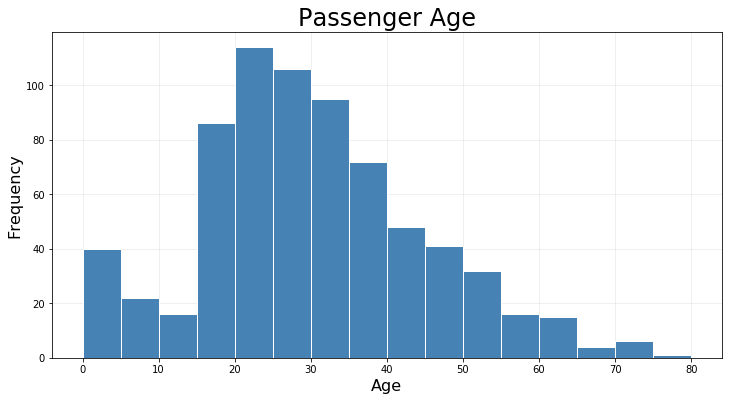

In [18]:
# SOLUTION:

fig, ax = plt.subplots(figsize=(12,6))
dfTitanic.hist(column="Age", ax=ax, facecolor="steelblue", edgecolor="white",bins=my_bins)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Passenger Age", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

The distribution is **unimodal** and has a rightward or **positive skew**.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* This problem is about a *ship* sinking in the *ocean*, so use **coral** and **seagreen** as the facecolors for your histogram boxes.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

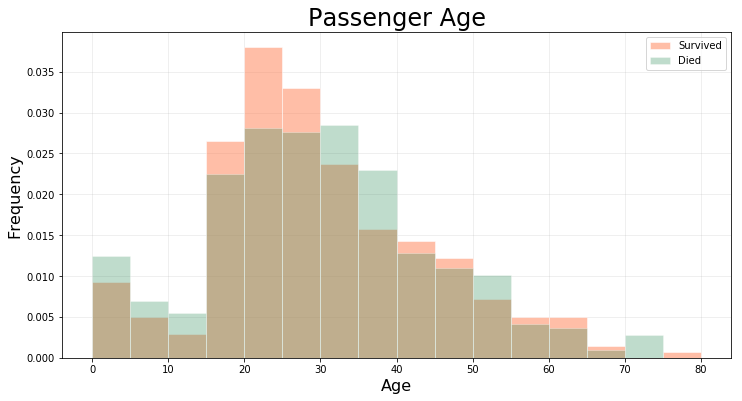

In [19]:
# SOLUTION:

bins = range(0,85,5)
fig, ax = plt.subplots(figsize=(12,6))
#dfTitanic.hist(column="Age", ax=ax, facecolor="steelblue", edgecolor="white",bins=bins, label="All passengers", alpha=0.5, density=True)
dfTitanic.loc[dfTitanic["Survived"]==1].hist(column="Age", ax=ax, facecolor="coral", edgecolor="white",bins=bins, alpha=0.5, label="Survived", density=True)
dfTitanic.loc[dfTitanic["Survived"]==0].hist(column="Age", ax=ax, facecolor="seagreen", edgecolor="white",bins=bins, alpha=0.3, label="Died", density=True)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Passenger Age", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend();

The density histogram for passengers who died is taller (i.e., more likely) for passengers under the age of 15 and passengers in their 30s. So it appears children and adults in their 30s were more likely to perish, whereas young adults (15-30) seem to be more likely than not to survive. For adults over the age of 40, there does not seem to be any discernable trend.

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Solution:**

It would be misleading to plot these as frequency histograms because there are many more passengers who did not survive the disaster (about 2/3 of them), so the frequency histogram for that data subset would have more area than the frequency histogram for the surviving passengers.

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

**Solution:**

Women tended to survive more than men, so it appears that the men were being chivalrous and making sure that the women got off the boat first. On the other hand, the first class folks were far more likely to survive. It looks, therefore, like a mix of both. 

[Back to top](#top)

<br>

<a/ id='p5'></a>

### (25 pts) Problem 5 - FCQ Data from Days of Yore
---

The `fcq_data.csv` data set on Canvas contains about 12 full academic years of Faculty Course Questionnaire (FCQ) data from the University of Colorado Boulder. The data include the year and term (fall or spring), the course subject and number, the distribution of grades, and other such information. The file `fcq_data_info.xlsx` contains some **metadata**, which describes what all of the columns in the main data file are, and how to interpret some of the measurements. Note that some of the columns from the original data set have been removed in order to make the file size a bit more manageable.

First, load the data file, and check out what are all of the available column headers.

In [20]:
df = pd.read_csv("fcq_data.csv")
print(df.columns)

Index(['YearTerm', 'Subject', 'Course', 'CourseTitle', 'Activity_Type',
       'Hours', 'N_EOT', 'N_ENROLL', 'N_GRADE', 'AVG_GRD', 'PCT_A', 'PCT_B',
       'PCT_C', 'PCT_D', 'PCT_F', 'PCT_C_MINUS_OR_BELOW', 'PCT_DF', 'PCT_DFW',
       'PCT_WDRAW', 'PCT_INCOMP', 'N_PASS', 'N_NOCRED', 'N_INCOMP',
       'Workload_Raw', 'Workload_Hrs_Wk', 'AvgCourse', 'AvgInstructor',
       'N_Ret'],
      dtype='object')


**Part A:** Suppose we want to restrict our attention to only undergraduate classes in the Computer Science department. Create a new DataFrame called `dfC` consisting only of undergraduate computer science classes. You may decide for yourself how to obtain only the rows corresponding to **undergraduate** and **computer science** courses. How many data points are there total?

In [21]:
# SOLUTION:

dfC = df.loc[(df["Subject"]=="CSCI") & (df["Course"] < 5000)]
print("There are {} data points".format(len(dfC)))

There are 617 data points


**Part B:** Using the undergraduate computer science courses DataFrame and the `isnull()` and/or `notnull()` (or `isna`/`notna`) methods in Pandas, determine which column(s) in are missing any data. Also using Pandas methods, report how many values are missing from each of those column(s). Finally, use the `dropna()` method to remove any rows that are missing data. For the remainder of this problem, use the cleaned DataFrame for analysis. How many data points are there in the cleaned DataFrame?

In [22]:
# SOLUTION:

drop_em = []
for col in dfC.columns:
    n_null = sum(dfC[col].isnull())
    if n_null > 0:
        drop_em.append(col)
        print("Column "+col+" is missing {} data points".format(n_null))
    else:
        print("Column "+col+" is okay!")

Column YearTerm is okay!
Column Subject is okay!
Column Course is okay!
Column CourseTitle is okay!
Column Activity_Type is okay!
Column Hours is okay!
Column N_EOT is okay!
Column N_ENROLL is okay!
Column N_GRADE is okay!
Column AVG_GRD is okay!
Column PCT_A is okay!
Column PCT_B is okay!
Column PCT_C is okay!
Column PCT_D is okay!
Column PCT_F is okay!
Column PCT_C_MINUS_OR_BELOW is okay!
Column PCT_DF is okay!
Column PCT_DFW is okay!
Column PCT_WDRAW is okay!
Column PCT_INCOMP is okay!
Column N_PASS is okay!
Column N_NOCRED is okay!
Column N_INCOMP is okay!
Column Workload_Raw is missing 27 data points
Column Workload_Hrs_Wk is missing 27 data points
Column AvgCourse is missing 27 data points
Column AvgInstructor is missing 27 data points
Column N_Ret is missing 23 data points


Columns `Workload_Raw`, `Workload_Hrs_Wk`, `AvgCourse` and `AvgInstructor` are all missing 27 data points each, and column `N_Ret` is missing 23 data points.

Now, we drop the rows with missing data:

In [23]:
dfC.dropna(subset=drop_em, inplace=True)
print("There are {} data points".format(len(dfC)))

There are 590 data points


/Users/tony/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Part C:** One might hypothesize that students' grades are higher in one credit-hour courses than in regular lecture sections. Note that `Hours` corresponds to the number of credit-hours a class is worth, and that Average Grades are provided in the data set on a GPA-scale (4=A, 3=B, and so on).

Compute the mean and median Average Grade for all undergraduate Computer Science courses, and for only the one credit-hour undergraduate Computer Science courses. Report all four of these numbers, and comment on the results. Does your calculation seem to support our hypothesis or not? 

In [24]:
# SOLUTION:

print("In all CSCI courses...")
print("... the mean Average Grade is {:0.3f}".format(dfC["AVG_GRD"].mean()))
print("... the median Average Grade is {:0.3f}".format(dfC["AVG_GRD"].median()))
print("")
print("In 1-credit courses...")
print("... the mean Average Grade is {:0.3f}".format(dfC.loc[dfC["Hours"]==1,"AVG_GRD"].mean()))
print("... the median Average Grade is {:0.3f}".format(dfC.loc[dfC["Hours"]==1,"AVG_GRD"].median()))

In all CSCI courses...
... the mean Average Grade is 3.231
... the median Average Grade is 3.260

In 1-credit courses...
... the mean Average Grade is 3.533
... the median Average Grade is 3.520


The mean and median grades for only the one-credit courses are about 3.5, which is **higher than** the mean and median grades for all CSCI courses, which are about 3.2. Later, we will learn how to determine if this is statistically significant or not! Yehoot!

**Part D:** Another hypothesis one might want to test using this data set is whether or not students' grades are different based on the course *level* - lower-division (1000s and 2000s) versus upper-division (3000s and 4000s). Create side-by-side box-and-whisker plots to compare the average grades of lower-division computer science courses versus upper-division computer science courses.  Use the box-and-whisker plot conventions discussed in lecture, and be sure to include a legend and label your axes.

Comment on the results. Does your figure suggest there is a difference in the distribution of average course grades, depending on whether a class is lower- or upper-division? If you noticed a difference between the two distributions, what is one cause that could explain this difference? Fully explain your reasoning.

In [25]:
# SOLUTION:

dfC["Level"] = "Lower"
dfC.loc[dfC["Course"] >= 3000, "Level"] = "Upper"

/Users/tony/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tony/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


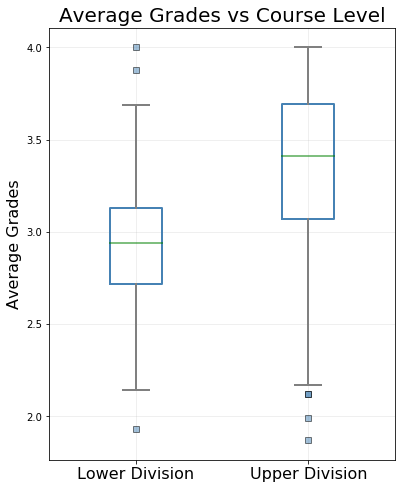

In [26]:
fig, ax = plt.subplots(figsize=(6,8))
bp = dfC.boxplot(column="AVG_GRD", by="Level", widths=[.3,.3], ax=ax, return_type='dict')
ax.set_title("Average Grades vs Course Level", fontsize=20)
ax.set_ylabel("Average Grades", fontsize=16)

for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)
        
# Set names of plots
plt.xticks([1,2],["Lower Division", "Upper Division"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

It looks like the lower division courses tend to have lower average grades than the upper division courses because the box-whisker plot is centered about half a letter grade (0.5) lower. This could be due to the fact that there are many non-majors or students just trying a subject/class out in lower-division courses, and then find out they do not like a subject after/before/while getting a bad grade in the class.

**Part E:** One more hypothesis we might want to explore is whether or not there has actually been a large increase in Computer Science enrollments in recent years. There are 12 academic years of data, which means there are 24 distinct semesters (from Fall 2006 to Spring 2018). For each semester, compute the total number of students enrolled in Computer Science courses. Note that you will almost certainly be counting some students twice (or more!), but that's okay - this is still a good measure of the total demand for Computer Science classes. Use the total number of students enrolled at the end of the term as the number of students for each class.

Make a plot of the total number of Computer Science students versus the semester, with the most recent semester (Spring 2018) on the right and most distant past (Fall 2006) on the left. Label your axes. For the semester axis (the x-axis), label with the actual semester as a character string, like "Fall 2006" or "Spring 2007", for example. You may want to look up how to rotate the x-tick labels in order to make the semester name labels fit nicely. Comment on the results and any interesting trends or patterns you notice in Computer Science enrollment numbers.

In [27]:
# SOLUTION:

term_names = []
enrollments = []
for sem in dfC.YearTerm.unique():
    # Get the term names for our plot
    year = str(sem)[:-1]
    term = str(sem)[-1]
    if term=="1":
        term_names.append("Spring "+year)
    else:
        term_names.append("Fall "+year)
    # Get the enrollment totals
    enrollments.append(dfC.loc[dfC["YearTerm"]==sem, "N_EOT"].sum())

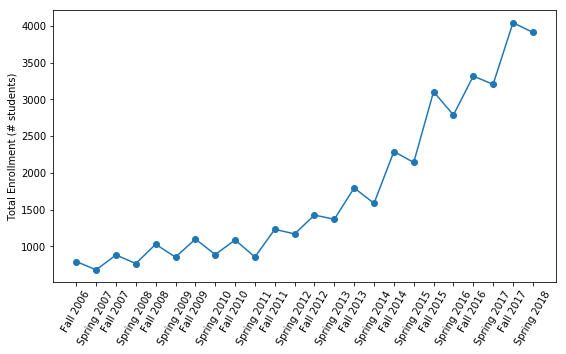

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
plt.plot(term_names, enrollments, '-o')
ax.set_xticklabels(term_names, rotation=60)
ax.set_ylabel('Total Enrollment (# students)');

This result seems to verify that there is a long-term increase in Computer Science enrollments, from about 1000 students per semester in 2006 to about 4000 in 2018. Also, there is an interesting pattern that within any given academic year, the fall enrollment is always slightly higher than the spring enrollment. Neat!

**Part F:** What is one way we could determine whether or not the Computer Science total enrollment is going up more than we should expect?

**Solution:**

There are many possible answers. Here are a couple things we could check:
* compare the trend from Part E to the trend in total CU enrollments
* compare the trend from Part E to the trend in enrollments in other "similar" departments (within Engineering, or maybe Physics or Mathematics, for example)
* compare the trend from the first 6 years of the data to the trend from the last 6 years of the data, and look for a marked increase

**Part G:** Formulate another interesting question you could potentially answer using this data set. You do not need to actually answer it, but just frame the question clearly. What are some of the relevant column(s) in the data set?

**Solution:**

Answers will vary. As long as you clearly articulate a question and name at least one relevant column, that is fine. One interesting question is whether or not average grades change with course level. Another is whether or not the FCQ scores `AvgCourse` and `AvgInstructor` change with class size.

[Back to top](#top)